# 作業 : (Kaggle)房價預測

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = '../data/house/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [13]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
print(len(df))

MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

1460


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

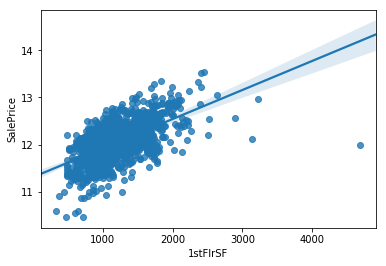

0.8499683837163878

In [14]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
mean_raw = cross_val_score(estimator, train_X, train_Y, cv=5).mean()

mean_raw

In [15]:
print(f"{df['1stFlrSF'].describe()}\n")

# 95% +-2std
# 99.7% +-3std
n_std = 3
cut_min = df['1stFlrSF'].mean() - n_std * df['1stFlrSF'].std()
cut_max = df['1stFlrSF'].mean() + n_std * df['1stFlrSF'].std()
print(f'{cut_min:.5f} ~ {cut_max:.5f}')

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

2.86350 ~ 2322.38993


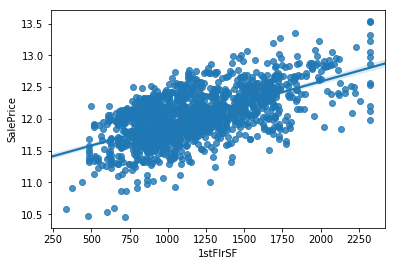

data range        : 2.863 ~ 2322.390
mean value change : 0.8499683837163878 -> 0.8872839242511062


In [16]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
df_filter = df.copy()
df_filter['1stFlrSF'] = df_filter['1stFlrSF'].clip(cut_min, cut_max)
sns.regplot(x = df_filter['1stFlrSF'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df_filter)
estimator = LinearRegression()
mean_filter = cross_val_score(estimator, train_X, train_Y, cv=5).mean()

mean_filter

print(f'data range        : {cut_min:.3f} ~ {cut_max:.3f}')
print(f'mean value change : {mean_raw} -> {mean_filter}')

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。
> 準確率提升<br>
> clip() 修改上下界不會刪去離群值，僅將離群值以上下界取代，資料筆數同原資料，資料兩端邊界筆數因離群修正比重增多，資料分布配置仍偏向兩端。<br>
> 刪除離群值，資料筆數減少，完全捨棄離群值造成效應

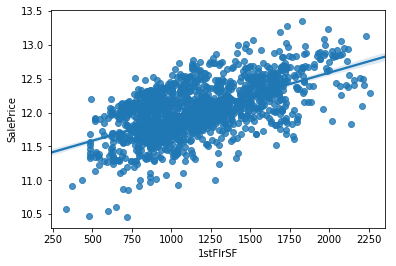

data range        : 2.863 ~ 2322.390
mean value change : 0.8499683837163878 -> 0.8904213287358361


In [17]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
df_filter_dropout = df.copy()
keep_indexs = (df_filter_dropout['1stFlrSF']> cut_min) & (df_filter_dropout['1stFlrSF']< cut_max)
df_filter_dropout = df_filter_dropout[keep_indexs]
train_Y = train_Y[keep_indexs]
sns.regplot(x = df_filter_dropout['1stFlrSF'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df_filter_dropout)
estimator = LinearRegression()
mean_filter_dropout = cross_val_score(estimator, train_X, train_Y, cv=5).mean()

mean_filter_dropout

print(f'data range        : {cut_min:.3f} ~ {cut_max:.3f}')
print(f'mean value change : {mean_raw} -> {mean_filter_dropout}')


In [9]:
print(f'mean value change : (調整){mean_filter} -> (捨棄){mean_filter_dropout}  \n = {mean_filter_dropout - mean_filter}')

print()
print(f'(調整) 資料筆數:{len(df_filter)}')
print(df_filter['1stFlrSF'].value_counts().sort_index(ascending=False).head())
print()
print(f'(捨棄) 資料筆數:{len(df_filter_dropout)}')
print(df_filter_dropout['1stFlrSF'].value_counts().sort_index(ascending=False).head())


mean value change : (調整)0.8872839242511062 -> (捨棄)0.8904213287358361  
 = 0.0031374044847298777

(調整) 資料筆數:1460
2322.389926    12
2259.000000     1
2234.000000     1
2223.000000     1
2217.000000     1
Name: 1stFlrSF, dtype: int64

(捨棄) 資料筆數:1448
2259    1
2234    1
2223    1
2217    1
2207    1
Name: 1stFlrSF, dtype: int64
